In [1]:
%matplotlib notebook

from modsim import *

In [2]:
kg = UNITS.kilogram
m = UNITS.meter
s = UNITS.second
N = UNITS.newton
degree = UNITS.degree

In [3]:
#mass of person
mass = 62.1422

In [4]:
#constants
g = 9.81
k_legs = 48000

In [5]:
#starting conditions
init = State(y = 0,
             v = 3)

In [6]:
duration = .30581039755351*2
ts = linrange (0, duration, .01)

In [7]:
system = System(init=init, g=g, ts=ts)

In [8]:
def slope_func(state, t, system):
    y, v = state
    unpack(system)
    
    dydt = v
    dvdt = -g
    
    return dydt, dvdt

In [9]:
slope_func(init, 0 , system)

(3, -9.81)

In [10]:
run_odeint(system, slope_func)

In [120]:
def plot_position(results, x = ''):
    plot(results.y, label = x)
    decorate(xlabel = 'Time (s)',
             ylabel = 'Position (m)')
    legend(loc = 'bestoutside')

<IPython.core.display.Javascript object>


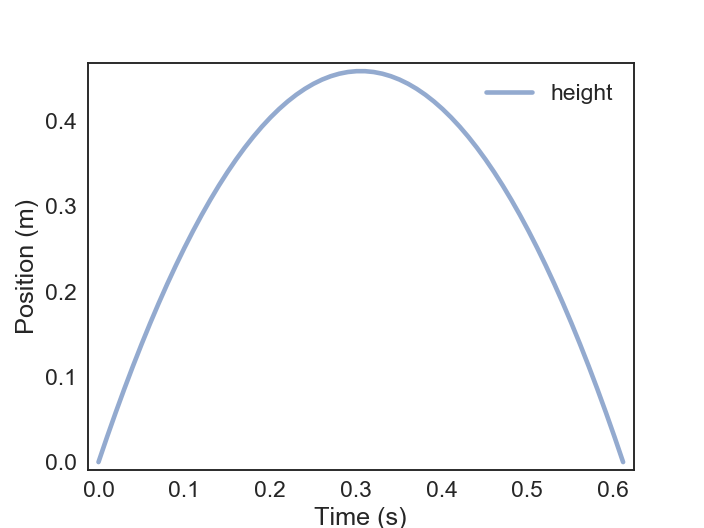

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "bestoutside". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))


In [121]:
newfig()
plot_position(system.results, 'height')

In [122]:
d = 0.45859872611464

In [123]:
x = .2
leg_PE = 1/2 * k_legs * x**2

In [124]:
v_final_down = sqrt(2*g*d) #vertical velocity right before contact with trampoline
t = sqrt(2*d/g) #time to reach trampoline
p = mass * v_final_down #momentum at bottom
force_down = p/t #force applied to trampoline

In [106]:
k = 2

In [107]:
tramp_displace = force_down / k #trampoline displacement
tramp_PE = 0.5 * k * tramp_displace**2 #elastic potential energy of trampoline

tramp_PE

92907.606569715092

In [108]:
Total_PE = tramp_PE + leg_PE

In [109]:
v_up = sqrt(2 * Total_PE / mass)

In [110]:

init_up = State(y = 0,
                v = v_up)

In [111]:
duration_up = v_up/g + duration

In [112]:
ts_up = linrange(duration, duration_up, .01)

In [113]:
system_up = System(init=init_up, g=g, ts=ts_up)

In [114]:
slope_func(init_up, 0, system_up)

(54.964155275595289, -9.81)

In [115]:
run_odeint(system_up, slope_func)

<IPython.core.display.Javascript object>


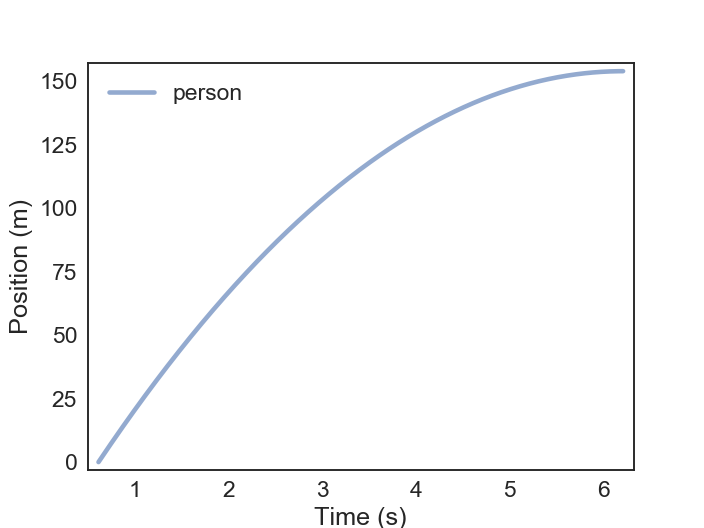

In [116]:
newfig()
plot_position(system_up.results, 'person')

In [135]:
k_values = linspace(10, 100, 21)
sweep = SweepSeries()

In [136]:
def plot_sweep():
    newfig()
    plot_position(system.results)
    for k in k_values:
        tramp_displace = force_down / k
        tramp_PE = 0.5 * k * tramp_displace**2
        Total_PE = tramp_PE + leg_PE
        v_up = sqrt(2 * Total_PE / mass)
        init_up = State(y = 0,
                        v = v_up)
        duration_up = v_up/g + duration
        ts_up = linrange(duration, duration_up, .01)
        system_up = System(init=init_up, g=g, ts=ts)
        slope_func(init_up, 0, system_up)
        run_odeint(system_up, slope_func)
        sweep[k] = system_up.results
        plot_position(sweep[k], int(k))
        
    

<IPython.core.display.Javascript object>


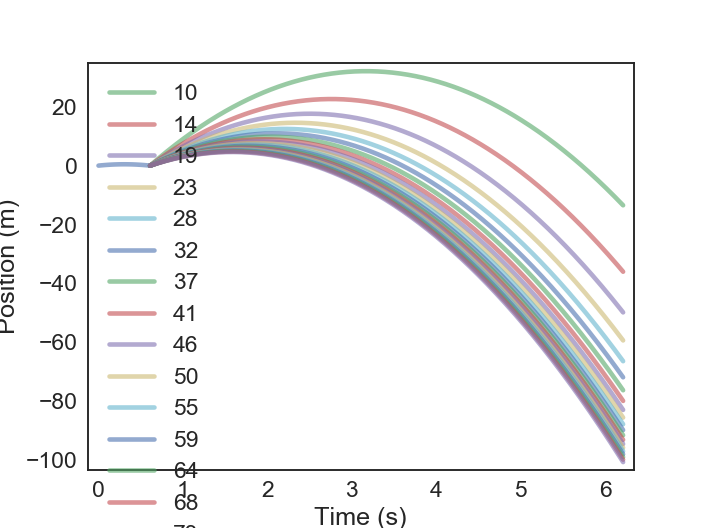

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "bestoutside". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))


In [137]:
plot_sweep()

In [44]:
k_values

<Quantity([   0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
   60.   65.   70.   75.   80.   85.   90.   95.  100.], 'kilogram / second ** 2')>